## Importing Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.feature_selection import SelectKBest, f_classif

In [3]:
# reading the data
cancer = pd.read_csv('Cancer_Data.csv')    
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
cancer["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [5]:
cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
# drop unnecessary columns
cancer.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)

In [7]:
# Basic dataset info
print("=== Dataset Overview ===")
print(f"Dataset shape: {cancer.shape}")
print(f"Features: {list(cancer.columns[1:])}")
print(f"Target variable: {cancer.columns[0]}")
print("\nData types:")
print(cancer.dtypes)

=== Dataset Overview ===
Dataset shape: (569, 31)
Features: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
Target variable: diagnosis

Data types:
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
frac

In [8]:
# Examine cancer prevalence
print("\n=== Target Variable Analysis ===")
cancer_dist = cancer['diagnosis'].value_counts()
print("Cancer distribution:")
print(cancer_dist)
print(f"Cancer prevalence, Benign: {(cancer['diagnosis'].value_counts(normalize=True).iloc[0]):.2%}")
print(f"Cancer prevalence, Malignant: {(cancer['diagnosis'].value_counts(normalize=True).iloc[1]):.2%}")


=== Target Variable Analysis ===
Cancer distribution:
diagnosis
B    357
M    212
Name: count, dtype: int64
Cancer prevalence, Benign: 62.74%
Cancer prevalence, Malignant: 37.26%


In [9]:
# Compare feature means between cancer and cancer groups
cancer_mal = cancer[cancer['diagnosis'] == "M"]
cancer_ben = cancer[cancer['diagnosis'] == "B"]

print("\n=== Feature Means by Cancer Status ===")
feature_means = pd.DataFrame({
    'Cancer_Mal': cancer_mal.drop('diagnosis', axis=1).mean(),
    'Cancer_Ben': cancer_ben.drop('diagnosis', axis=1).mean()
})


feature_means['Difference'] = abs(feature_means['Cancer_Ben'] - feature_means['Cancer_Mal'])
print(feature_means.round(2))


=== Feature Means by Cancer Status ===
                         Cancer_Mal  Cancer_Ben  Difference
radius_mean                   17.46       12.15        5.32
texture_mean                  21.60       17.91        3.69
perimeter_mean               115.37       78.08       37.29
area_mean                    978.38      462.79      515.59
smoothness_mean                0.10        0.09        0.01
compactness_mean               0.15        0.08        0.07
concavity_mean                 0.16        0.05        0.11
concave points_mean            0.09        0.03        0.06
symmetry_mean                  0.19        0.17        0.02
fractal_dimension_mean         0.06        0.06        0.00
radius_se                      0.61        0.28        0.33
texture_se                     1.21        1.22        0.01
perimeter_se                   4.32        2.00        2.32
area_se                       72.67       21.14       51.54
smoothness_se                  0.01        0.01        0.00


In [10]:
# Filter features with significant differences
print("\n=== Features with Significant Differences ===")
mask = feature_means['Difference'] > 30
feature_means[mask]


=== Features with Significant Differences ===


,Cancer_Mal,Cancer_Ben,Difference
perimeter_mean,115.365377,78.075406,37.289971
area_mean,978.376415,462.790196,515.586219
area_se,72.672406,21.135148,51.537257
perimeter_worst,141.370330,87.005938,54.364392
area_worst,1422.286321,558.899440,863.386881



=== Perimeter Mean Analysis ===
Perimeter Mean - Benign: 78.1 ± 11.8
Perimeter Mean - Malignant: 115.4 ± 21.9


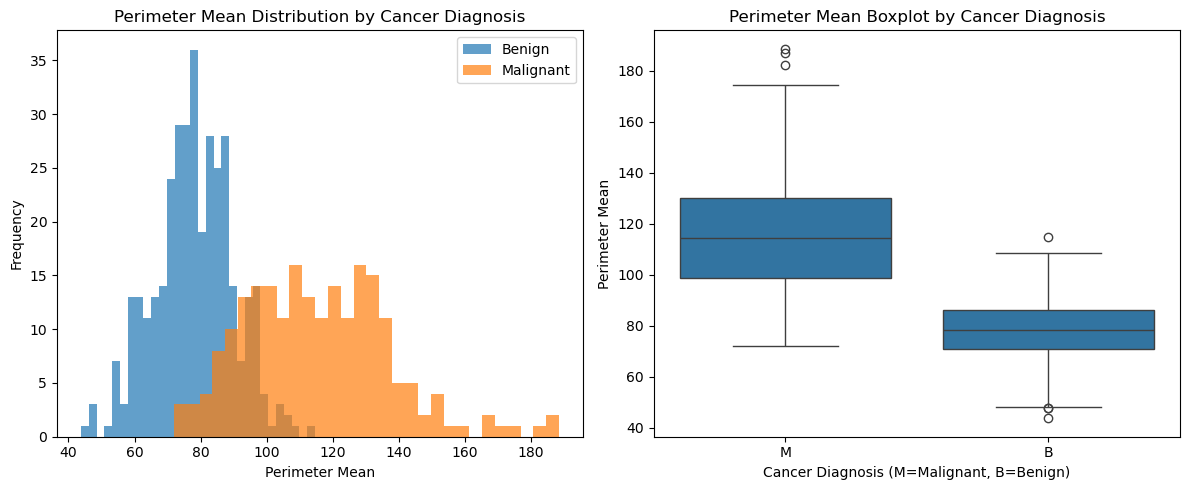

In [11]:
# Detailed perimeter mean analysis
print("\n=== Perimeter Mean Analysis ===")
print(f"Perimeter Mean - Benign: {cancer_ben['perimeter_mean'].mean():.1f} ± {cancer_ben['perimeter_mean'].std():.1f}")
print(f"Perimeter Mean - Malignant: {cancer_mal['perimeter_mean'].mean():.1f} ± {cancer_mal['perimeter_mean'].std():.1f}")

# Perimeter Mean distribution plot
# HISTOGRAM
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(cancer_ben['perimeter_mean'], alpha=0.7, label='Benign', bins=30)
plt.hist(cancer_mal['perimeter_mean'], alpha=0.7, label='Malignant', bins=30)
plt.xlabel('Perimeter Mean')
plt.ylabel('Frequency')
plt.title('Perimeter Mean Distribution by Cancer Diagnosis')
plt.legend()

# BOXPLOT
plt.subplot(1, 2, 2)
sns.boxplot(data=cancer, x='diagnosis', y='perimeter_mean')
plt.title('Perimeter Mean Boxplot by Cancer Diagnosis')
plt.xlabel('Cancer Diagnosis (M=Malignant, B=Benign)')
plt.ylabel('Perimeter Mean')

plt.tight_layout()
plt.show()


=== Area Mean Analysis ===
Area Mean - Benign: 462.8 ± 134.3
Area Mean - Malignant: 978.4 ± 367.9


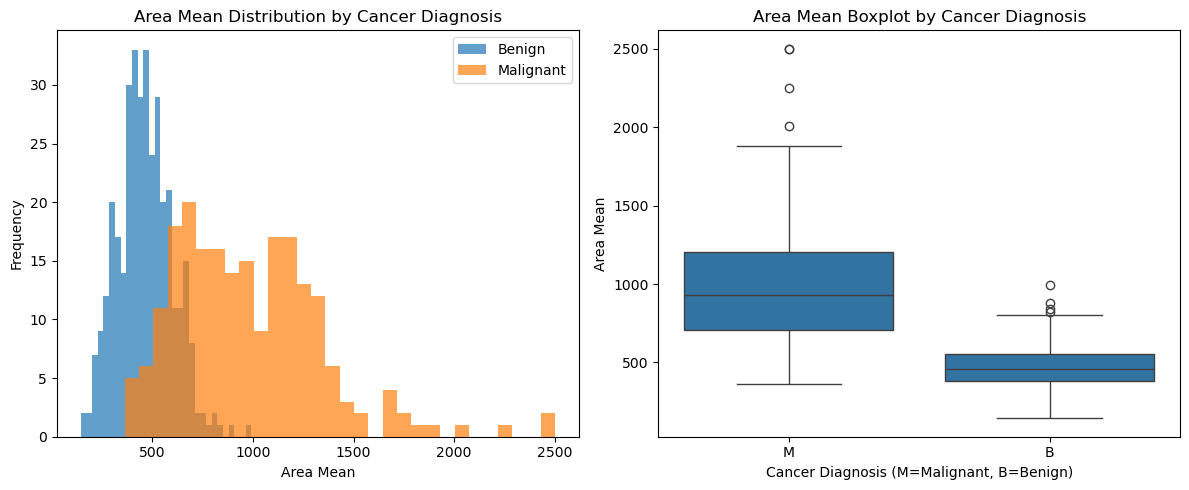

In [12]:
# Detailed Area mean analysis
print("\n=== Area Mean Analysis ===")
print(f"Area Mean - Benign: {cancer_ben['area_mean'].mean():.1f} ± {cancer_ben['area_mean'].std():.1f}")
print(f"Area Mean - Malignant: {cancer_mal['area_mean'].mean():.1f} ± {cancer_mal['area_mean'].std():.1f}")

# Area Mean distribution plot
# HISTOGRAM
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(cancer_ben['area_mean'], alpha=0.7, label='Benign', bins=30)
plt.hist(cancer_mal['area_mean'], alpha=0.7, label='Malignant', bins=30)
plt.xlabel('Area Mean')
plt.ylabel('Frequency')
plt.title('Area Mean Distribution by Cancer Diagnosis')
plt.legend()

# BOXPLOT
plt.subplot(1, 2, 2)
sns.boxplot(data=cancer, x='diagnosis', y='area_mean')
plt.title('Area Mean Boxplot by Cancer Diagnosis')
plt.xlabel('Cancer Diagnosis (M=Malignant, B=Benign)')
plt.ylabel('Area Mean')

plt.tight_layout()
plt.show()


=== Area Se Analysis ===
Area Se - Benign: 21.1 ± 8.8
Area Se - Malignant: 72.7 ± 61.4


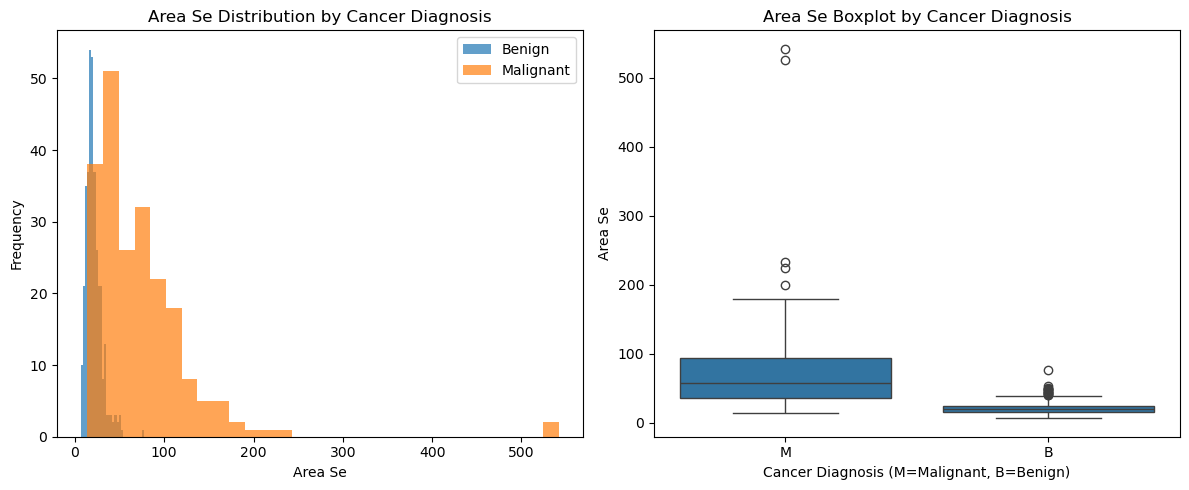

In [13]:
# Detailed Area se analysis
print("\n=== Area Se Analysis ===")
print(f"Area Se - Benign: {cancer_ben['area_se'].mean():.1f} ± {cancer_ben['area_se'].std():.1f}")
print(f"Area Se - Malignant: {cancer_mal['area_se'].mean():.1f} ± {cancer_mal['area_se'].std():.1f}")

# Area Se distribution plot
# HISTOGRAM
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(cancer_ben['area_se'], alpha=0.7, label='Benign', bins=30)
plt.hist(cancer_mal['area_se'], alpha=0.7, label='Malignant', bins=30)
plt.xlabel('Area Se')
plt.ylabel('Frequency')
plt.title('Area Se Distribution by Cancer Diagnosis')
plt.legend()

# BOXPLOT
plt.subplot(1, 2, 2)
sns.boxplot(data=cancer, x='diagnosis', y='area_se')
plt.title('Area Se Boxplot by Cancer Diagnosis')
plt.xlabel('Cancer Diagnosis (M=Malignant, B=Benign)')
plt.ylabel('Area Se')

plt.tight_layout()
plt.show()


=== Perimeter Worst Analysis ===
Perimeter Worst - Benign: 87.0 ± 13.5
Perimeter Worst - Malignant: 141.4 ± 29.5


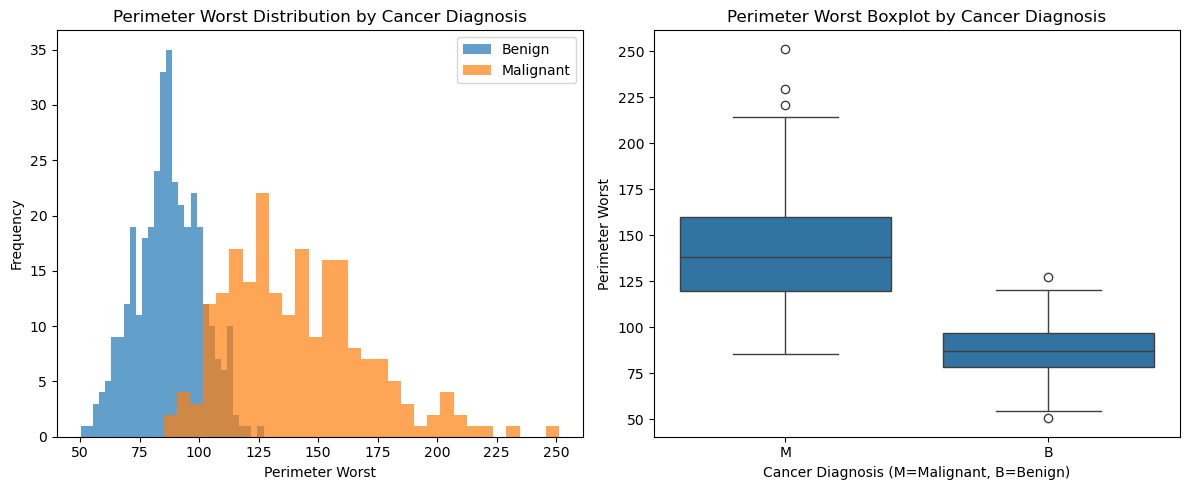

In [14]:
# Detailed Perimeter Worst analysis
print("\n=== Perimeter Worst Analysis ===")
print(f"Perimeter Worst - Benign: {cancer_ben['perimeter_worst'].mean():.1f} ± {cancer_ben['perimeter_worst'].std():.1f}")
print(f"Perimeter Worst - Malignant: {cancer_mal['perimeter_worst'].mean():.1f} ± {cancer_mal['perimeter_worst'].std():.1f}")

# Perimeter Worst distribution plot
# HISTOGRAM
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(cancer_ben['perimeter_worst'], alpha=0.7, label='Benign', bins=30)
plt.hist(cancer_mal['perimeter_worst'], alpha=0.7, label='Malignant', bins=30)
plt.xlabel('Perimeter Worst')
plt.ylabel('Frequency')
plt.title('Perimeter Worst Distribution by Cancer Diagnosis')
plt.legend()

# BOXPLOT
plt.subplot(1, 2, 2)
sns.boxplot(data=cancer, x='diagnosis', y='perimeter_worst')
plt.title('Perimeter Worst Boxplot by Cancer Diagnosis')
plt.xlabel('Cancer Diagnosis (M=Malignant, B=Benign)')
plt.ylabel('Perimeter Worst')

plt.tight_layout()
plt.show()


=== Area Worst Analysis ===
Area Worst - Benign: 558.9 ± 163.6
Area Worst - Malignant: 1422.3 ± 598.0


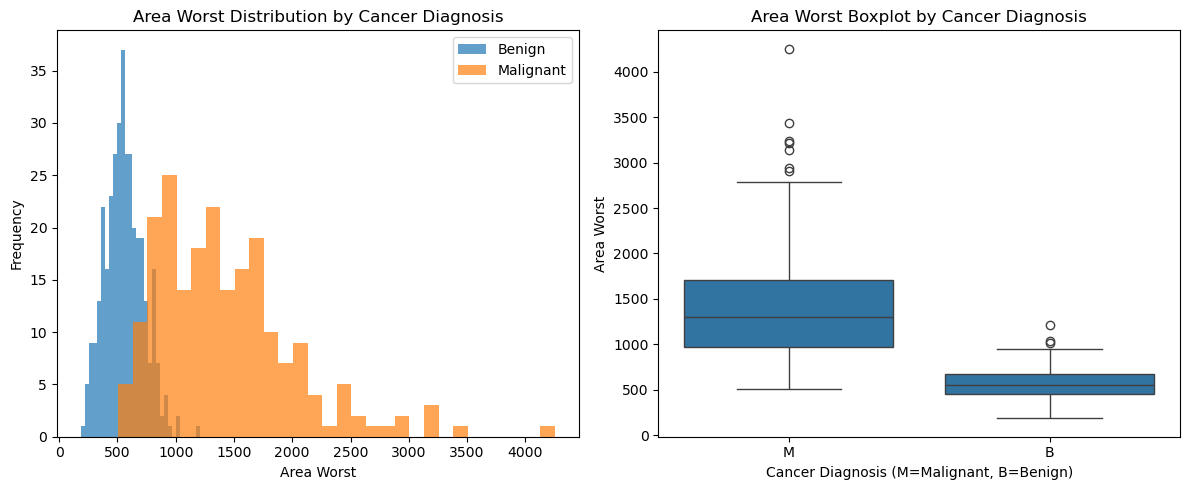

In [15]:
# Detailed Area Worst analysis
print("\n=== Area Worst Analysis ===")
print(f"Area Worst - Benign: {cancer_ben['area_worst'].mean():.1f} ± {cancer_ben['area_worst'].std():.1f}")
print(f"Area Worst - Malignant: {cancer_mal['area_worst'].mean():.1f} ± {cancer_mal['area_worst'].std():.1f}")

# Area Worst distribution plot
# HISTOGRAM
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(cancer_ben['area_worst'], alpha=0.7, label='Benign', bins=30)
plt.hist(cancer_mal['area_worst'], alpha=0.7, label='Malignant', bins=30)
plt.xlabel('Area Worst')
plt.ylabel('Frequency')
plt.title('Area Worst Distribution by Cancer Diagnosis')
plt.legend()

# BOXPLOT
plt.subplot(1, 2, 2)
sns.boxplot(data=cancer, x='diagnosis', y='area_worst')
plt.title('Area Worst Boxplot by Cancer Diagnosis')
plt.xlabel('Cancer Diagnosis (M=Malignant, B=Benign)')
plt.ylabel('Area Worst')

plt.tight_layout()
plt.show()

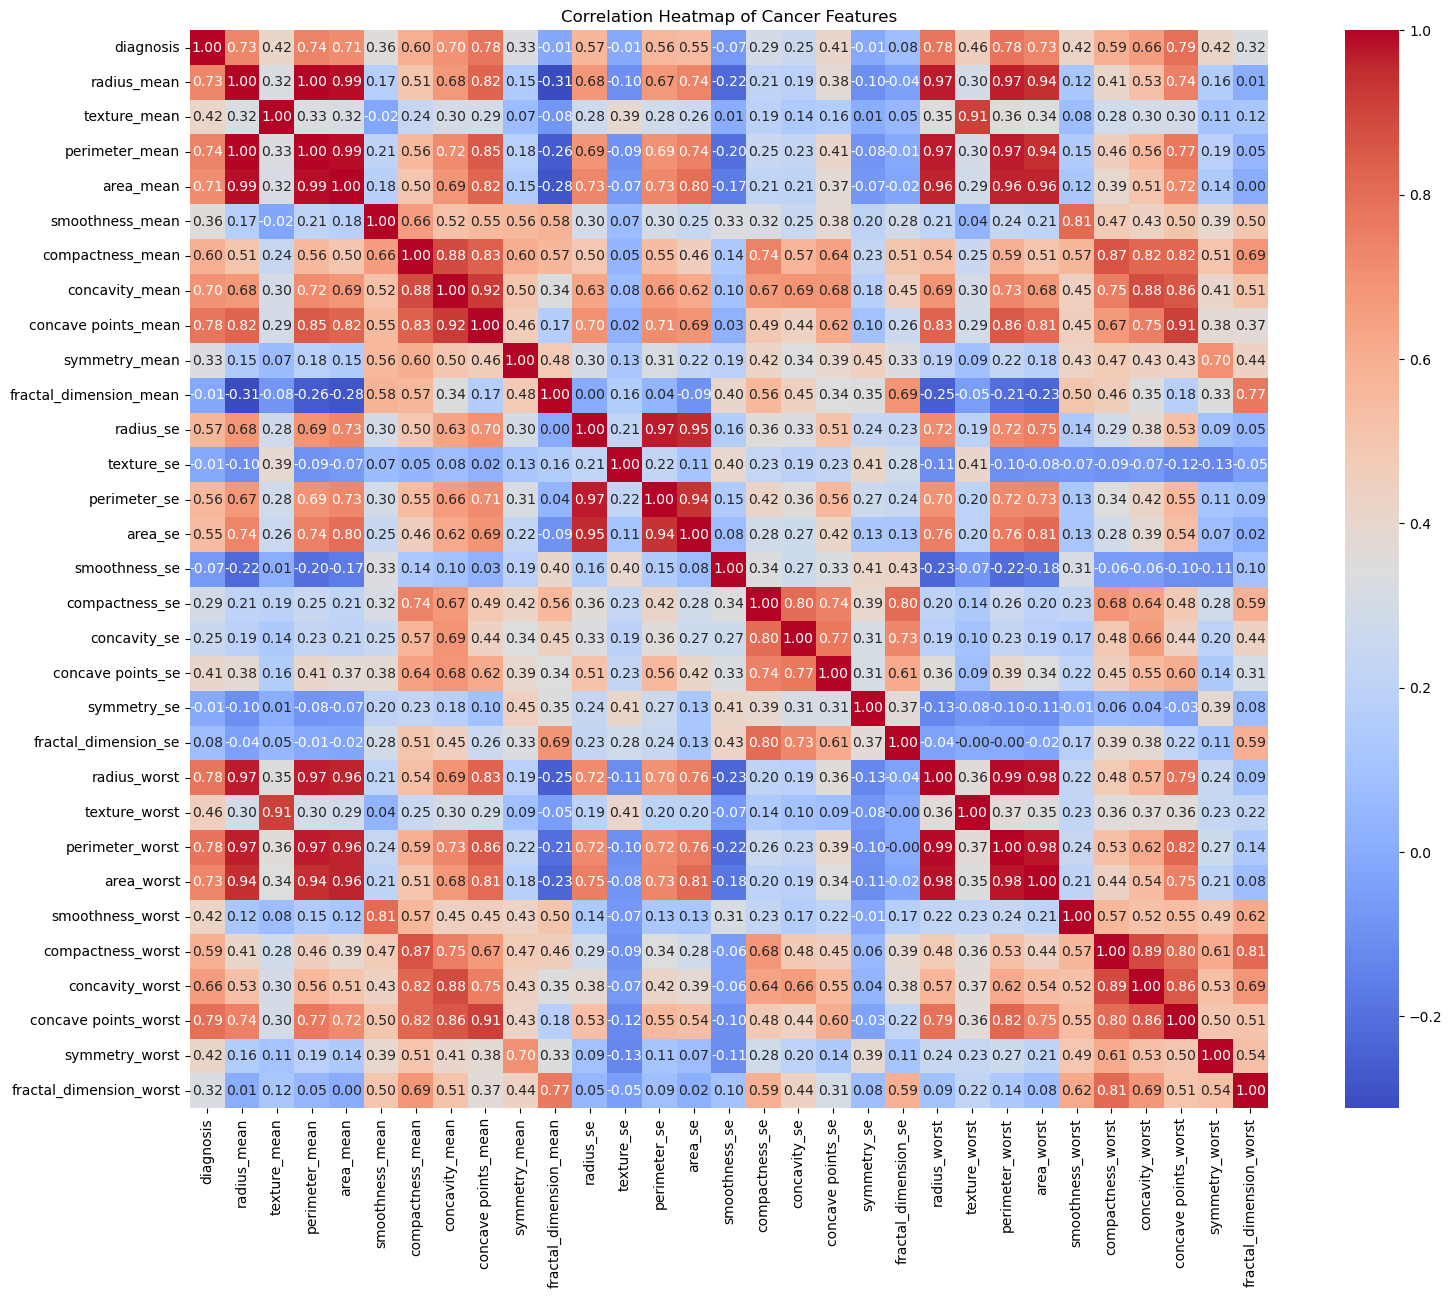

In [16]:
# Correlation heatmap
plt.figure(figsize=(20, 14))
cancer_modified = cancer.copy()
cancer_modified['diagnosis'] = cancer_modified['diagnosis'].map({'M': 1, 'B': 0})  # Convert diagnosis to numerical values
sns.heatmap(cancer_modified.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Cancer Features');

In [17]:
diag_dict = {"M": 0, "B": 1}
cancer_copy = cancer.copy()
cancer_copy["diagnosis"] = cancer_copy["diagnosis"].map(diag_dict)
cancer_copy

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [18]:
# Splitting data into training and testing sets
X = cancer_copy[cancer_copy.columns[1:]]
y = cancer_copy[cancer_copy.columns[0]] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train.shape

(455,)

## Checking model performances on the data

In [19]:
# grid search for KNN
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ["euclidean", "manhattan"]
}

grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    cv=10,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
0.9384057971014492


In [20]:
x = grid_search.best_params_
x

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}

In [21]:
# grid search for hyperparameters
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid_rf, scoring='accuracy',
    verbose=1, n_jobs=-1)

rf_grid.fit(X_train, y_train)

print("Best parameters: ", rf_grid.best_params_)
print("Best score: ", rf_grid.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters:  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best score:  0.9648351648351647


In [22]:
# classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(solver='liblinear', max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(max_depth= 20, min_samples_split= 5, n_estimators= 200, random_state=42),
    "K-NN": KNeighborsClassifier(metric="manhattan", n_neighbors=7, weights="distance")
}

def classifier(classifier_name, classifier):
    pipe = make_pipeline(StandardScaler(), classifier)
    pipe.fit(X_train, y_train)
    y_train_pred = pipe.predict(X_train)
    print(f"{classifier_name} Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
    predicted = pipe.predict(X_test)
    accuracy = accuracy_score(y_test, predicted)
    print(f"{classifier_name} Test Accuracy: {accuracy}")

for i, x in classifiers.items():
    classifier(i, x)    

Logistic Regression Train Accuracy: 0.9868131868131869
Logistic Regression Test Accuracy: 0.9736842105263158
Decision Tree Train Accuracy: 1.0
Decision Tree Test Accuracy: 0.9473684210526315
Random Forest Train Accuracy: 0.9956043956043956
Random Forest Test Accuracy: 0.9649122807017544
K-NN Train Accuracy: 1.0
K-NN Test Accuracy: 0.9649122807017544


## Using Cross Validation

In [23]:
# cross validation scores
def cross_val_scores(model_name, model):
    scores = cross_val_score(model, X, y, cv=10, scoring="accuracy")
    mean_score = scores.mean()
    print("{} Accuracy: {:.2f}%".format(model_name, mean_score * 100))

for i, x in classifiers.items():
    cross_val_scores(i, x)   

Logistic Regression Accuracy: 95.08%
Decision Tree Accuracy: 92.80%
Random Forest Accuracy: 96.49%
K-NN Accuracy: 92.98%


### Settling for Logistic Regression

In [24]:
# logistic regression pipeline
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver='liblinear', max_iter=1000, random_state=42))
])

# cross validation scores for the model
lr_cv_scores = cross_val_score(lr_pipeline, X, y, cv=10, scoring='accuracy')
lr_score = lr_cv_scores.mean()
print("Cross-validation accuracy: {:.2f}%".format(lr_score * 100))

Cross-validation accuracy: 98.24%


In [25]:
# fitting the model on the training data and predicting on the test data
lr_pipeline.fit(X_train, y_train)

# predicting the training data
y_train_pred = lr_pipeline.predict(X_train)


In [26]:

# Evaluate the model on training data
print("Model Evaluation")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")    
print("\nClassification Report:\n", classification_report(y_train, y_train_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print(f"ROC AUC: {roc_auc_score(y_train, y_train_pred):.4f}")

Model Evaluation
Accuracy: 0.9868

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       169
           1       0.99      0.99      0.99       286

    accuracy                           0.99       455
   macro avg       0.99      0.98      0.99       455
weighted avg       0.99      0.99      0.99       455


Confusion Matrix:
 [[165   4]
 [  2 284]]
ROC AUC: 0.9847


In [27]:
# predicting the test data using the model
y_test_pred = lr_pipeline.predict(X_test)

# Evaluate the model
print("Model Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")    
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print(f"ROC AUC: {roc_auc_score(y_test, y_test_pred):.4f}")

Model Evaluation
Accuracy: 0.9737

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Confusion Matrix:
 [[41  2]
 [ 1 70]]
ROC AUC: 0.9697


In [28]:
# feature importance
coefficients = lr_pipeline.named_steps['classifier'].coef_[0]
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': coefficients, 'Abs Importance': np.abs(coefficients)}).sort_values(by='Abs Importance', ascending=False)
top10 = feature_importances.head(10)
bottom10 = feature_importances.tail(10)

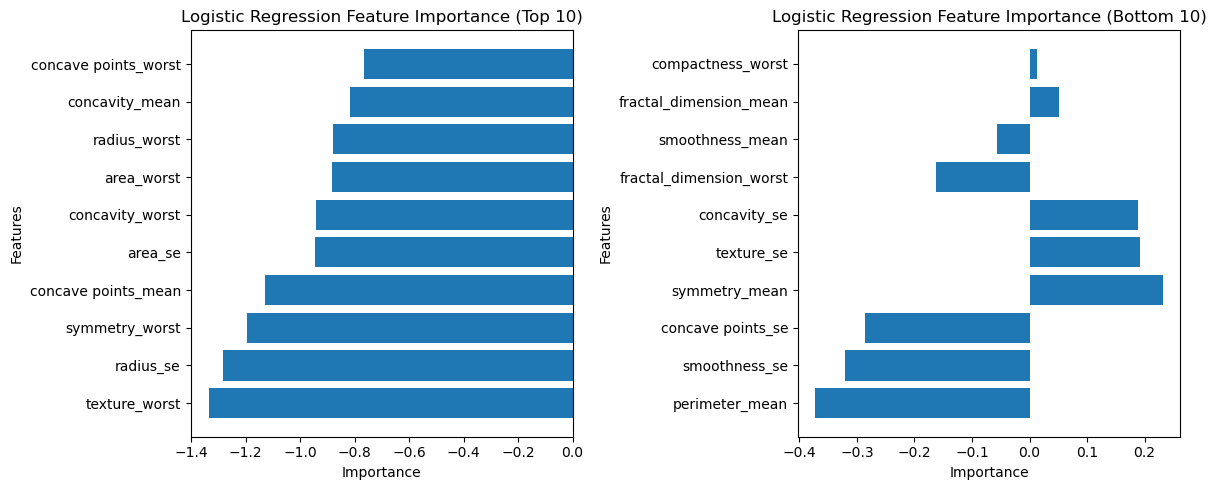

In [29]:
# feature importance plot
plt.figure(figsize=(12, 5))

# Top 10 features 
plt.subplot(1, 2, 1)
plt.barh(top10['Feature'], top10['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Logistic Regression Feature Importance (Top 10)')

# bottom 10 features
plt.subplot(1, 2, 2)    
plt.barh(bottom10['Feature'], bottom10['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Logistic Regression Feature Importance (Bottom 10)')

plt.tight_layout()
plt.show()

## Random Forest

In [30]:
# random forest pipeline
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(max_depth= 20, min_samples_split= 5, n_estimators= 200, random_state=42))
])

# fit the model on training data
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=20, min_samples_split=5,
                                        n_estimators=200, random_state=42))])

In [31]:
# predict on train data
y_pred_train = rf_pipeline.predict(X_train)
print("Model Evaluation")
print(f"Accuracy: {accuracy_score(y_train, y_pred_train):.4f}")    
print("\nClassification Report:\n", classification_report(y_train, y_pred_train))
print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_pred_train))
print(f"ROC AUC: {roc_auc_score(y_train, y_pred_train):.4f}\n")

# predict on test data
y_pred_test = rf_pipeline.predict(X_test)
print("Model Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred_test):.4f}")    
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_test):.4f}")

Model Evaluation
Accuracy: 0.9956

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       169
           1       0.99      1.00      1.00       286

    accuracy                           1.00       455
   macro avg       1.00      0.99      1.00       455
weighted avg       1.00      1.00      1.00       455


Confusion Matrix:
 [[167   2]
 [  0 286]]
ROC AUC: 0.9941

Model Evaluation
Accuracy: 0.9649

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Confusion Matrix:
 [[40  3]
 [ 1 70]]
ROC AUC: 0.9581


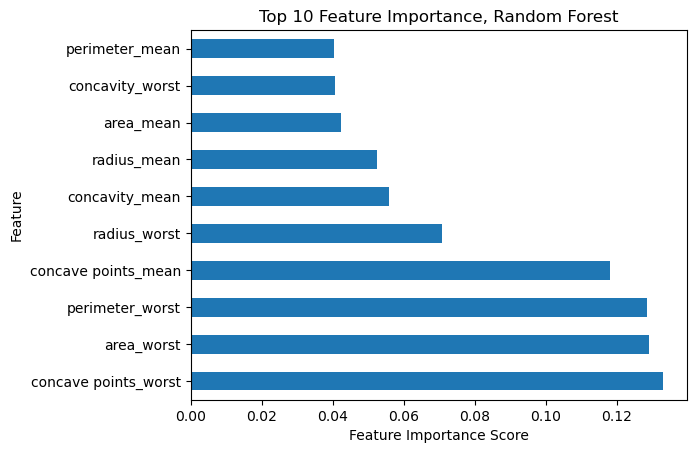

In [32]:
# feature_importances
feat_imp = rf_pipeline.named_steps["classifier"].feature_importances_
feat_imp = pd.Series(feat_imp, index=X_train.columns)
feat_imp.nlargest(10).plot(kind="barh")
plt.title("Top 10 Feature Importance, Random Forest")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.show()

## Anova_f Values

In [33]:
# Anova F value
Xa = cancer_copy[cancer_copy.columns[1:]]
ya = cancer_copy[cancer_copy.columns[0]]

# Xa.shape
# ya.shape


selector = SelectKBest(
    score_func=f_classif, k=10
)

X_selected = selector.fit_transform(Xa, ya)

# Get selected feature names
selected_features_mask = selector.get_support()
selected_feature_names = Xa.columns[selected_features_mask]

print("\nSelected features (f_classif):", selected_feature_names.tolist())
print("Selected features shape:", X_selected.shape) 



Selected features (f_classif): ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concavity_worst', 'concave points_worst']
Selected features shape: (569, 10)


In [34]:
Xf = cancer_copy[selected_feature_names]
yf = cancer_copy['diagnosis']

# splitting the data into training and testing sets
Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, yf, test_size=0.2, random_state=42)
# Xf_train.shape, Xf_test.shape, yf_train.shape, yf_test.shape    

In [35]:
lr_pipeline_f = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver='liblinear', max_iter=1000, random_state=42))
])

In [36]:
# cross validation scores for the model
lr_cv_scores = cross_val_score(lr_pipeline_f, Xf, yf, cv=10, scoring='accuracy')
lr_score = lr_cv_scores.mean()
print("Cross-validation accuracy: {:.2f}%".format(lr_score * 100))

Cross-validation accuracy: 95.44%


In [37]:
# fitting data into the model
lr_pipeline_f.fit(Xf_train, yf_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42,
                                    solver='liblinear'))])

In [38]:
# predicting the training data
yf_train_pred = lr_pipeline_f.predict(Xf_train)

# Evaluate the model
print("Model Evaluation")
print(f"Accuracy: {accuracy_score(yf_train, yf_train_pred):.4f}")    
print("\nClassification Report:\n", classification_report(yf_train, yf_train_pred))
print("\nConfusion Matrix:\n", confusion_matrix(yf_train, yf_train_pred))
print(f"ROC AUC: {roc_auc_score(yf_train, yf_train_pred):.4f}")

Model Evaluation
Accuracy: 0.9626

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       169
           1       0.97      0.98      0.97       286

    accuracy                           0.96       455
   macro avg       0.96      0.96      0.96       455
weighted avg       0.96      0.96      0.96       455


Confusion Matrix:
 [[159  10]
 [  7 279]]
ROC AUC: 0.9582


In [39]:
# predicting the test data using the model
yf_test_pred = lr_pipeline_f.predict(Xf_test)

# Evaluate the model
print("Model Evaluation")
print(f"Accuracy: {accuracy_score(yf_test, yf_test_pred):.4f}")    
print("\nClassification Report:\n", classification_report(yf_test, yf_test_pred))
print("\nConfusion Matrix:\n", confusion_matrix(yf_test, yf_test_pred))
print(f"ROC AUC: {roc_auc_score(yf_test, yf_test_pred):.4f}")

Model Evaluation
Accuracy: 0.9737

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Confusion Matrix:
 [[42  1]
 [ 2 69]]
ROC AUC: 0.9743


In [40]:
# feature importance for Anova F values
coefficients_f = lr_pipeline_f.named_steps['classifier'].coef_[0]
feature_importances_f = pd.DataFrame({'Feature': Xf_train.columns, 'Importance': coefficients_f, 'Abs Importance': np.abs(coefficients_f)}).sort_values(by='Abs Importance', ascending=False)
feature_importances_f

,Feature,Importance,Abs Importance
7,area_worst,-1.898217,1.898217
5,radius_worst,-1.810151,1.810151
9,concave points_worst,-1.250260,1.250260
4,concave points_mean,-1.219198,1.219198
6,perimeter_worst,-1.019593,1.019593
1,perimeter_mean,0.590587,0.590587
8,concavity_worst,-0.522831,0.522831
0,radius_mean,0.426046,0.426046
3,concavity_mean,0.198934,0.198934
2,area_mean,-0.073537,0.073537


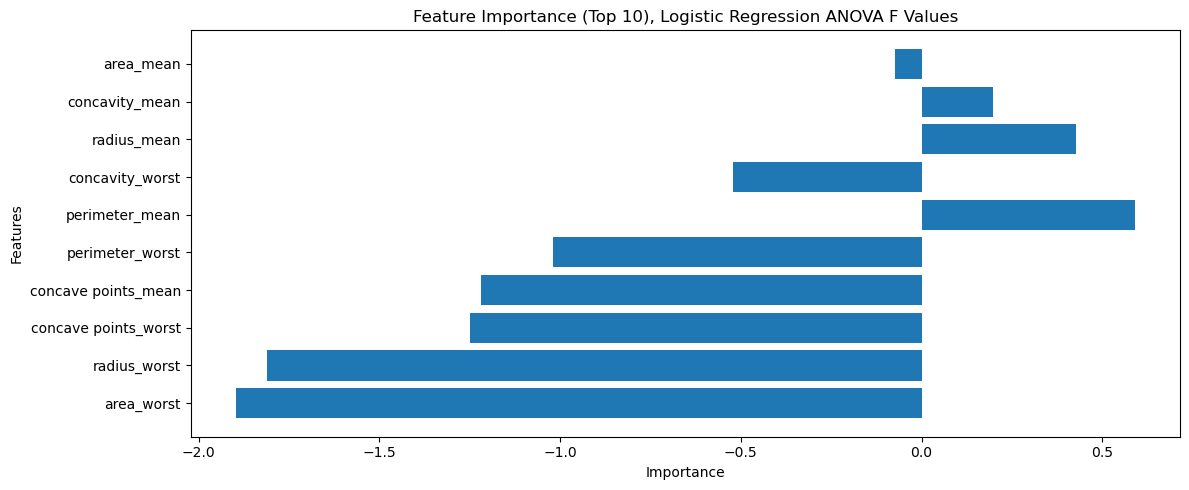

In [41]:
# feature importance plot for ANOVA F values
plt.figure(figsize=(12, 5))
plt.barh(feature_importances_f['Feature'], feature_importances_f['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance (Top 10), Logistic Regression ANOVA F Values')
plt.tight_layout()
plt.show()

## Random Forest

In [42]:
rf_pipeline_f = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(max_depth= 20, min_samples_split= 5, n_estimators= 200, random_state=42))
])

In [43]:
# fit data
rf_pipeline_f.fit(Xf_train, yf_train)

# predict on train data
yf_train_pred = rf_pipeline_f.predict(Xf_train)

# Evaluate the model
print("Model Evaluation")
print(f"Accuracy: {accuracy_score(yf_train, yf_train_pred):.4f}")    
print("\nClassification Report:\n", classification_report(yf_train, yf_train_pred))
print("\nConfusion Matrix:\n", confusion_matrix(yf_train, yf_train_pred))
print(f"ROC AUC: {roc_auc_score(yf_train, yf_train_pred):.4f}")



Model Evaluation
Accuracy: 0.9978

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       169
           1       1.00      1.00      1.00       286

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455


Confusion Matrix:
 [[168   1]
 [  0 286]]
ROC AUC: 0.9970


In [44]:
# predict on test data
yf_test_pred = rf_pipeline_f.predict(Xf_test)

# evaluate the model on test data
print("Model Evaluation")
print(f"Accuracy: {accuracy_score(yf_test, yf_test_pred):.4f}")    
print("\nClassification Report:\n", classification_report(yf_test, yf_test_pred))
print("\nConfusion Matrix:\n", confusion_matrix(yf_test, yf_test_pred))
print(f"ROC AUC: {roc_auc_score(yf_test, yf_test_pred):.4f}")

Model Evaluation
Accuracy: 0.9561

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Confusion Matrix:
 [[40  3]
 [ 2 69]]
ROC AUC: 0.9510


In [45]:
# feature importance for Anova F values
feat_imp_f = rf_pipeline_f.named_steps['classifier'].feature_importances_
feature_importances_f = pd.DataFrame({'Feature': Xf_train.columns, 'Importance': feat_imp_f}).sort_values(by='Importance', ascending=False)
feature_importances_f

,Feature,Importance
9,concave points_worst,0.230117
6,perimeter_worst,0.186627
4,concave points_mean,0.158424
5,radius_worst,0.143756
7,area_worst,0.122418
8,concavity_worst,0.041039
1,perimeter_mean,0.035943
3,concavity_mean,0.033996
2,area_mean,0.027897
0,radius_mean,0.019782


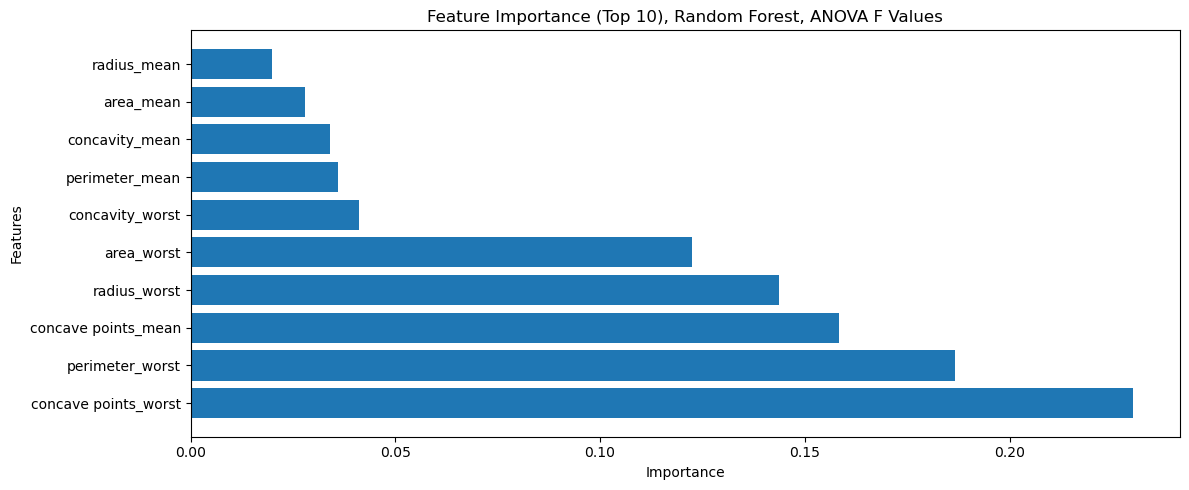

In [46]:
# feature importance plot for ANOVA F values
plt.figure(figsize=(12, 5))
plt.barh(feature_importances_f['Feature'], feature_importances_f['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance (Top 10), Random Forest, ANOVA F Values')
plt.tight_layout()
plt.show()